## Image Encryption Algorithm using chaotic map

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#image pixel shuffling using logistic map

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/lena_gray.bmp")
img = np.array(img)

len(img)

512

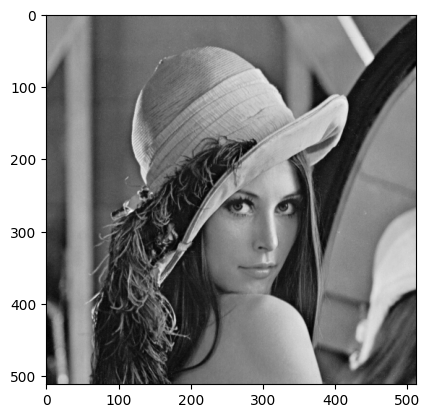

In [ ]:
#before shuffling

plt.imshow(img,cmap='gray')
plt.show()

### Key Mixing Proportion factor

In [ ]:
#key mixing proportion factor - KMPF(k)
#KMPF is used to change the initial parameters to prevent the statistical attacks

def KMPF(z,m,n):
  k = 0
  for i in range(round((z-1)*m/4)+1,round(z*m/4)):
    for j in range(0,n):
      k =  (k + img[i][j]) % 256
  return k/256

### Shuffling using Logistic maps

In [ ]:
kmpf1 = KMPF(1,len(img),len(img[0]))
kmpf2 = KMPF(2,len(img),len(img[0]))

row_indices = list(range(0,len(img)));
x = [0.0] * len(img);


r = (25.67 + kmpf1)/2;
x[0] = (0.01 + kmpf2)/2;

for i in range(1,len(img)):

  #using the key mixing proportion factor to change the values of initial parameters at each iterations
  x[i] = (r * x[i-1] * (1 - x[i-1])) % 256;

row_sorted_indices = [x for _,x in sorted(zip(x,row_indices))];

y = [0.0] * len(img[0])
y[0] = (0.01 + kmpf2)/2;

for i in range(1,len(img[0])):
  y[i] = (r * y[i-1] * (1 - y[i-1])) % 256;

col_indices = list(range(0,len(img[0])))

col_sorted_indices = [x for _,x in sorted(zip(y,col_indices))]

#row shuffling

row_shuffled_img = np.zeros([len(img),len(img[0])],dtype=int);
for i in range(0,len(row_indices)):
  row_shuffled_img[i] = img[row_sorted_indices[i]]

#column shuffling

shuffled_img = np.zeros([len(img),len(img[0])],dtype=int)
for i in range(0,len(img)):
  k=0
  for j in range(0,len(img[0])):
    shuffled_img[i][j] = row_shuffled_img[i][col_sorted_indices[k]]
    k = k + 1

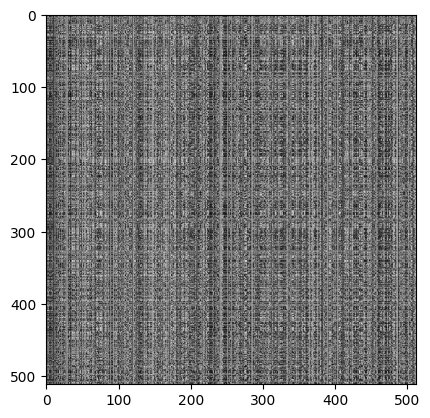

In [ ]:
#shuffled image

plt.imshow(shuffled_img,cmap = 'gray');
plt.show();

Substitution using two dimensional piecewise nonlinear smooth chaotic map

In [ ]:
#two dimensional non linear smooth chaotic map

rows = len(img)
cols = len(img[0])

print("rows : ",rows," columns :",cols)

rows :  512  columns : 512


In [ ]:
shuffled_img = shuffled_img.flatten()
shuffled_img

array([219, 217,  41, ...,  78, 125, 167])

### generation of two sequences of size m*n

In [ ]:

q1 = [0.0] * (rows*cols)
q2 = [0.0] * (rows*cols)

kmpf3 = KMPF(3,rows,cols);
kmpf4 = KMPF(4,rows,cols);

q1[0] = (0.0002 + kmpf3)/2;
q2[0] = (0.0008 + kmpf4)/2;
theta = 0.35
c1 = 0.55
c2 = 0.3
k1 = 2.95
k2 = 2

for i in range(1,rows*cols):
  q = (q2[i-1] * (1 + k2*theta - 2*k2*(c2 + theta)*q1[i-1])/(1 + theta*k2*q2[i-1])) % 256
  if q1[i-1] >= q:
    q1[i] = (q1[i-1]*(1 + k1*(1-2*(1+c1)*q1[i-1]) - theta*q2[i-1])) % 256
    q2[i] = (q2[i-1]*(1+k2*(theta*(1 - q1[i-1] - 2*q2[i-1]))-2*c2*q2[i-1])) % 256
  else:
    q1[i] = (q1[i-1]*(1+k1*(1-2*(1+c1)*q1[i-1]) - theta*q2[i-1])) % 256;
    q2[i] = q1[i-1]


In [ ]:
#preprocessing the produced sequence
import math

for i in range(0,rows*cols):
  q1[i] = math.floor((q1[i] * 1e14) % 256)
  q2[i] = math.floor((q2[i] * 1e14) % 256)

print(q1)

[96, 104, 204, 200, 148, 136, 38, 212, 194, 171, 63, 196, 134, 52, 168, 116, 24, 136, 161, 178, 94, 76, 46, 182, 19, 2, 98, 91, 16, 71, 158, 68, 156, 252, 151, 82, 156, 3, 20, 0, 44, 18, 71, 110, 116, 204, 192, 207, 28, 114, 184, 156, 36, 91, 26, 71, 242, 140, 102, 84, 52, 100, 88, 208, 18, 31, 232, 186, 168, 64, 116, 140, 168, 162, 46, 232, 65, 112, 90, 12, 111, 188, 252, 161, 240, 210, 236, 28, 176, 231, 116, 160, 72, 2, 36, 80, 60, 60, 158, 52, 115, 36, 30, 101, 234, 24, 224, 144, 66, 232, 102, 22, 178, 98, 196, 56, 238, 117, 254, 186, 52, 153, 217, 68, 212, 156, 183, 77, 172, 44, 218, 202, 210, 202, 124, 112, 176, 40, 102, 154, 234, 152, 194, 56, 226, 195, 88, 220, 214, 195, 72, 90, 226, 200, 16, 196, 226, 188, 255, 228, 241, 224, 150, 97, 148, 194, 34, 192, 96, 249, 237, 168, 112, 201, 226, 239, 156, 117, 50, 155, 8, 169, 148, 236, 84, 253, 192, 200, 232, 230, 160, 44, 225, 242, 4, 0, 172, 210, 24, 252, 160, 232, 56, 76, 124, 104, 124, 70, 225, 104, 32, 36, 108, 124, 56, 70, 24, 1

In [ ]:
map = [0] * (rows*cols)

for i in range(0,rows*cols):
  map[i] = q1[i] ^ q2[i]

In [ ]:
subs_img = [0] * (rows*cols)

for i in range(0,rows*cols):
  subs_img[i] = shuffled_img[i] ^ map[i]

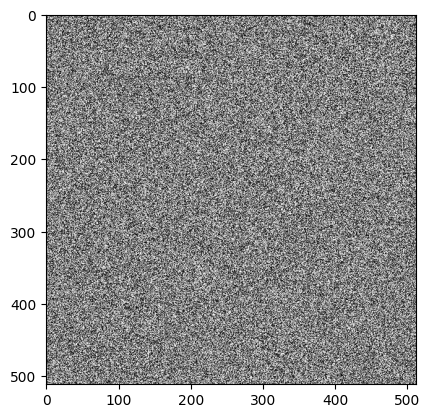

In [ ]:
subs_img = np.array(subs_img).reshape(rows,cols)

plt.imshow(subs_img,cmap = "gray")

In [ ]:
subs_img = Image.fromarray(np.uint8(subs_img)).convert('L')
subs_img.save('EncryptedImage.png')

from google.colab import files
files.download('EncryptedImage.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Decryption

In [ ]:
#converting 2d array to 1d array

subs_img = np.array(subs_img).flatten()
subs_img

array([123,  53, 205, ..., 123, 213,  16], dtype=uint8)

In [ ]:
#generation of two sequences of size m*n

q1 = [0.0] * (rows*cols)
q2 = [0.0] * (rows*cols)

q1[0] = (0.0002 + kmpf3)/2;
q2[0] = (0.0008 + kmpf4)/2;

theta = 0.35
c1 = 0.55
c2 = 0.3
k1 = 2.95
k2 = 2

for i in range(1,rows*cols):
  q = (q2[i-1] * (1 + k2*theta - 2*k2*(c2 + theta)*q1[i-1])/(1 + theta*k2*q2[i-1])) % 256
  if q1[i-1] >= q:
    q1[i] = (q1[i-1]*(1 + k1*(1-2*(1+c1)*q1[i-1]) - theta*q2[i-1])) % 256
    q2[i] = (q2[i-1]*(1+k2*(theta*(1 - q1[i-1] - 2*q2[i-1]))-2*c2*q2[i-1])) % 256
  else:
    q1[i] = (q1[i-1]*(1+k1*(1-2*(1+c1)*q1[i-1]) - theta*q2[i-1])) % 256;
    q2[i] = q1[i-1]


In [ ]:
#preprocessing the produced sequence
import math

for i in range(0,rows*cols):
  q1[i] = math.floor((q1[i] * 1e14) % 256)
  q2[i] = math.floor((q2[i] * 1e14) % 256)

In [ ]:
map = [None] * (rows*cols)

for i in range(0,rows*cols):
  map[i] = q1[i] ^ q2[i]

map[1:10]

[236, 228, 4, 92, 12, 90, 242, 22, 105]

In [ ]:
org_img = [0] * (rows*cols)

for i in range(0,rows*cols):
  org_img[i] = subs_img[i] ^ map[i]


In [ ]:
org_img = np.array(org_img).reshape(rows,cols)
org_img

array([[219, 217,  41, ..., 139, 145, 137],
       [221, 219,  44, ..., 136, 145, 137],
       [122, 119, 160, ..., 152, 129, 133],
       ...,
       [119, 119,  53, ...,  53, 166, 146],
       [148, 143,  98, ..., 118, 144, 171],
       [153, 151, 107, ...,  78, 125, 167]])

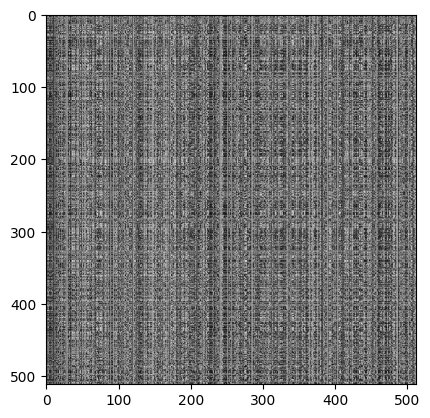

In [ ]:
plt.imshow(org_img,cmap='gray')

### reshuffling the shuffled image using the reverse of shuffling algorithm

In [ ]:

row_indices = list(range(0,len(org_img)));
x = [0.0] * len(org_img);

#kmpf1 = KMPF(1,len(org_img),len(org_img[0]));
#kmpf2 = KMPF(2,len(org_img),len(org_img[0]));

r = (25.67 + kmpf1)/2;
x[0] = (0.01 + kmpf2)/2;


for i in range(1,len(org_img)):
  x[i] = (r * x[i-1] * (1 - x[i-1])) % 256;

row_sorted_indices = [x for _,x in sorted(zip(x,row_indices))];

temp_img = np.zeros([len(org_img),len(org_img[0])],dtype=int);

for i in range(0,len(row_indices)):
  temp_img[row_sorted_indices[i]] = org_img[i];

y = [0.0] * len(org_img[0])
y[0] = (0.01 + kmpf2)/2;


for i in range(1,len(org_img[0])):
  y[i] = (r * y[i-1] * (1 - y[i-1])) % 256;

col_indices = list(range(0,len(org_img[0])))

col_sorted_indices = [x for _,x in sorted(zip(y,col_indices))]

orginal_img = np.zeros([len(org_img),len(org_img[0])],dtype=int)
for i in range(0,len(org_img)):
  k=0
  for j in range(0,len(org_img[0])):
    orginal_img[i][col_sorted_indices[k]] = temp_img[i][j]
    k = k + 1

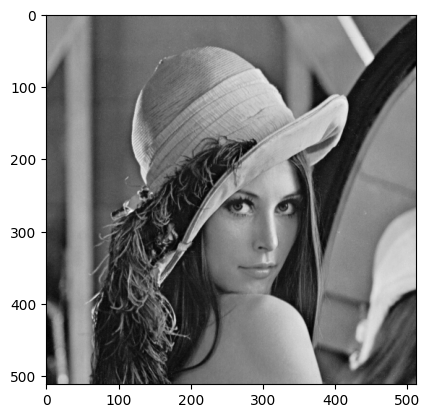

In [ ]:
#decrypted plain image

plt.imshow(orginal_img,cmap = 'gray')